## Training Your Own Linear Regressesor

Create a linear regressor, with a Scikit-learn compatible fit-predict interface. You should implement every detail of the linear regressor in Python, using whatever library you want (except a linear regressor itself).

You must investigate and describe all major details for a linear regressor, and implement at least the following concepts (MUST):

### Qa: Concepts and Implementations MUSTS

* the `fit-predict` interface, and a $R^2$ score function,
* one-dimensional output only,
* loss function based on (R)MSE,
* setting of the number of iterations and learning rate ($\eta$) via parameters in the constructor, the signature of your `__init__` must include the named parameters `max_iter` and `eta0`,
* the batch-gradient decent algorithm (GD),
* constant or adaptive learning rate,
* learning graphs,
* stochastic gradient descent (SGD),
* epochs vs iteations,

In [1]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import r2_score

class MyLinearRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, max_iter=1000, eta0=0.01, gd_type='batch'):
        self.max_iter = max_iter # Number of iterations
        self.eta0 = eta0 # Learning rate
        self.gd_type = gd_type # Which fit should be run
        self.weights = None
        self.bias = None
        
    def fit(self, X, y_true):
        m, n = X.shape
        self.weights = np.zeros(n)  # Initialize weights with zeros
        self.bias = 0  # Initialize bias with zero

        #Gemini chatbot has been used to give us the idea to split the fit up
        #So the linear regressor can be initialized with either batch or stochastic gradiant descent 
    
        if self.gd_type == 'batch':
            self.fit_batch_gd(X, y_true)
        elif self.gd_type == 'sgd':
            self.fit_sgd(X, y_true)
        else:
            raise ValueError("Invalid gradient descent type")
        
    #This method has been created by using Gemini chatbot:
    def fit_batch_gd(self, X, y_true):
        m, n = X.shape

        for _ in range(self.max_iter):
            # Calculate predictions
            y_pred = self.predict(X)

            # Calculate errors
            errors = y_pred - y_true

            # Update weights and bias using gradient descent
            self.weights -= self.eta0 * (1/m) * np.dot(X.T, errors)
            self.bias -= self.eta0 * (1/m) * np.sum(errors)
            
    #This method has been created by using Gemini chatbot:  
    def fit_sgd(self, X, y_true):
        m, n = X.shape
        
        for _ in range(self.max_iter):
            for i in range(m):  # Iterate over each example
                random_index = np.random.randint(0, m)  # Pick a random sample
                x_i = X[random_index:random_index + 1]  # Select the ith sample
                y_i = y_true[random_index:random_index + 1]

                # Calculate predictions
                y_pred = self.predict(x_i)

                # Calculate errors
                errors = y_pred - y_i

                # Update weights and bias using gradient descent
                self.weights -= self.eta0 * np.dot(x_i.T, errors)
                self.bias -= self.eta0 * np.sum(errors)

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

    def score(self, X, y):
        return r2_score(y, self.predict(X))

    def RMSE(self, y_pred, y_true):
        self.checkInputSameShape(y_pred, y_true)
          
        # Calculate squared differences (L2)
        squared_diff = (y_true - y_pred) ** 2
        
        # Compute mean of squared differences
        mean_squared_diff = np.mean(squared_diff)
        
        # Take square root to obtain RMSE
        rmse_value = np.sqrt(mean_squared_diff)
        
        return rmse_value
    
    # From our own previous assignment
    def checkInputSameShape(self, y_pred, y_true):
        assert y_pred.shape == y_true.shape, "Shape of input is not equal!"



### Qc: Testing and Test Data

In the following exercise the Iris data has been used to test the regressors by fitting them with the data. Following this the RMSE score will be found and compared between the batch- and stochastic gradiant descent.

RMSE score from the batch regressor: 0.224463870262065
RMSE score from the sgd regressor: 0.26243393474496346

It is seen that the batch regressor in most cases has a lower RMSE score than the sgd regressor

This can also be visually represented by plotting the predictions and comparing these with the true value


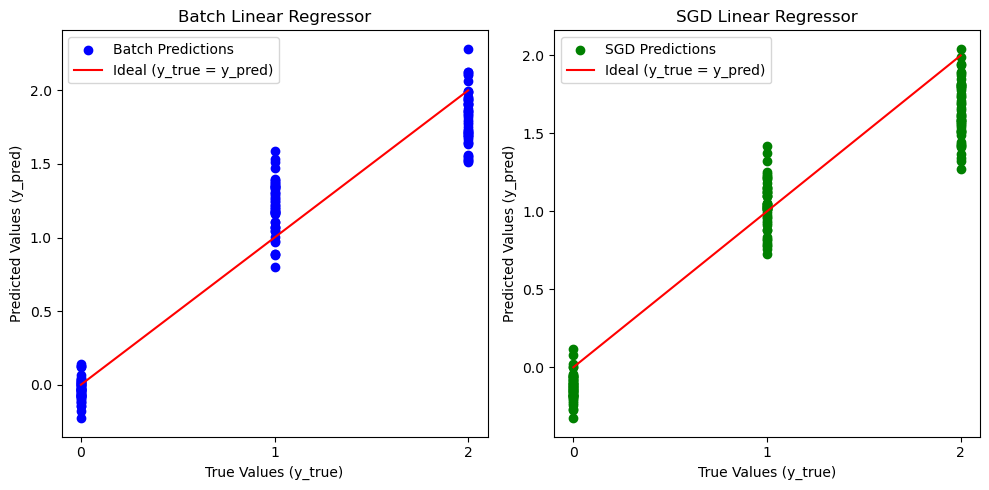

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y_true = iris.target

# Init the linear regressor, batch and sgd:
regressor_batch = MyLinearRegressor(gd_type="batch")
regressor_sgd = MyLinearRegressor(gd_type="sgd")

# Fit linear regressor with iris data:
regressor_batch.fit(X, y_true)
regressor_sgd.fit(X,y_true)

# Make prediction for batch:
y_pred_batch = regressor_batch.predict(X)
rmse_batch = regressor_batch.RMSE(y_pred_batch, y_true)
print(f"RMSE score from the batch regressor: {rmse_batch}")

# Make prediction for sgd:
y_pred_sgd = regressor_sgd.predict(X)
rmse_sgd = regressor_sgd.RMSE(y_pred_sgd, y_true)
print(f"RMSE score from the sgd regressor: {rmse_sgd}")

print("\nIt is seen that the batch regressor in most cases has a lower RMSE score than the sgd regressor")

print("\nThis can also be visually represented by plotting the predictions and comparing these with the true value")
plt.figure(figsize=(10, 5))

# Batch Regressor
plt.subplot(1, 2, 1)
plt.scatter(y_true, y_pred_batch, color='blue', label='Batch Predictions')
plt.plot(y_true, y_true, color='red', label='Ideal (y_true = y_pred)')  # Ideal line
plt.xlabel('True Values (y_true)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Batch Linear Regressor')
plt.legend()
plt.xticks([0, 1, 2]) # Three flower types

# SGD Regressor
plt.subplot(1, 2, 2)
plt.scatter(y_true, y_pred_sgd, color='green', label='SGD Predictions')
plt.plot(y_true, y_true, color='red', label='Ideal (y_true = y_pred)')  # Ideal line
plt.xlabel('True Values (y_true)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('SGD Linear Regressor')
plt.legend()
plt.xticks([0, 1, 2]) # Three flower types

plt.tight_layout()
plt.show()

### Qd: The Journaling of Your Regressor 

For the journal, write a full explanation of how you implemented the linear regressor, including a code walk-through (or mini-review of the most interesting parts).

The `__init__` is a constructor for our class, where its parameter are the number of iteration to go through, the learning rate and which type of model we want to use.

The `fit` method is where we implement the generel fit structure, first we split up the dataset X, into m and n. M is the number of training examples and n is the number of features. 

Then we create a weight matrix that is the size of n, but it's filled with 0. One of the reasons this is done, is because we don't want the model to favour any specific feature in the first training phase. We also initialize the bias with 0, and this value will change during the training. 

After this we'll look at what model the object is initialized to use and use that specific fit method

`fit_batch_gd` is the fit method for batch gd. First we find the number of training examples m, then we run the code that is about to be descriped in a for loop, where it'll run for the amount of iterations that's been specified. 

First we'll use the predict method on our data and save this as y_pred. Then the y_true will be subtracted from the y_pred and this will result in the amount of errors in the prediction. 

Based on these errors the weights and bias' will be updated based on gradient descent.

`fit_sgd` is the fit method for the stochastic gd. Again we extract the number of training examples m, then this time we'll have a for loop inside of a for loop. The first for loop is the same as the previous one, it'll run for the amount of iterations as specified. The second for loop will run for the amount of training examples in the dataset. 

First there'll be picked a random sample, then the X sample value and y_true sample value will be picked based on the random sample. Then the predict method will be used of X sample value and the return value will be y_pred. 

Now the y_true sample will be deducted from the y_pred to find the error between the two samples and the weights and bias' will be changed based on gradient descent. 

`predict` is the predict method for the model. It'll use a dataset X, weights and bias to try and predict the y value. It'll do this by taking dot product between dataset matrix X and the weight matrix and then add the bias to the result. 

`score` is a method that uses the r2score-method. the r2score-method will compare y_true and y_pred and then give a r2 score. So the higher the score, the better our model has predicted the results. 

`RMSE` this method is used to calculate the loss of the model, the closer it is to 0, the better. First we're checking if y_pred and y_true are the same shape, this is done with the method `checkInputSameShape`.

Afterwards we first need to calculate the squared difference between y_pred and y_true. Then we get the mean of this squared difference. Now we have the MSE score, but we would like the RMSE score, so we're taking the rootsquare of the MSE value and now we have the RMSE score. 

### Qe: Mathematical Foundation for Training a Linear Regressor

The data Matrix X that is used by our `MyLinearRegressor` in most of it's methods like the fit method, it is represented by the following equation:

$$
    \def\rem#1{}
    \rem{ITMAL: CEF def and LaTeX commands, remember: no  newlines in defs}
    \def\eq#1#2{#1 &=& #2\\}
    \def\ar#1#2{\begin{array}{#1}#2\end{array}}
    \def\ac#1#2{\left[\ar{#1}{#2}\right]}
    \def\st#1{_{\textrm{#1}}}
    \def\norm#1{{\cal L}_{#1}}
    \def\obs#1#2{#1_{\textrm{\scriptsize obs}}^{\left(#2\right)}}
    \def\diff#1{\mathrm{d}#1}
    \def\pown#1{^{(#1)}}
    \def\pownn{\pown{n}}
    \def\powni{\pown{i}}
    \def\powtest{\pown{\textrm{\scriptsize test}}}
    \def\powtrain{\pown{\textrm{\scriptsize train}}}
    \def\bX{\mathbf{M}}
    \def\bX{\mathbf{X}}
    \def\bZ{\mathbf{Z}}
    \def\bw{\mathbf{m}}
    \def\bx{\mathbf{x}}
    \def\by{\mathbf{y}}
    \def\byt{\mathbf{y}\st{true}}
    \def\yt{y\st{true}}
    \def\bz{\mathbf{z}}
    \def\bw{\mathbf{w}}
    \def\btheta{{\boldsymbol\theta}}
    \def\bSigma{{\boldsymbol\Sigma}}
    \def\half{\frac{1}{2}}
    \def\pfrac#1#2{\frac{\partial~#1}{\partial~#2}}
    \def\dfrac#1#2{\frac{\mathrm{d}~#1}{\mathrm{d}#2}}
\bX =
        \ac{cccc}{
            x_1\pown{1} & x_2\pown{1} & \cdots & x_d\pown{1} \\
            x_1\pown{2} & x_2\pown{2} & \cdots & x_d\pown{2}\\
            \vdots      &             &        & \vdots \\
            x_1\pownn   & x_2\pownn   & \cdots & x_d\pownn\\
        } 
$$ 


The y_true that is used by our `MyLinearRegressor` is represented by the following equation, which represents the true output values, this is also one of the arguments used by the fit method:   

$$
\byt =
  \ac{c}{
     \yt\pown{1} \\
     \yt\pown{2} \\
     \vdots \\
     \yt\pown{n} \\
  } 
$$

The y_pred, which represents the predicted output values is represented in the same form.

The following equation for the linear regression model hypothesis function, this is what is implemented in the `predict` method, where the weights and bias are used to create a prediction value y_pred, which as described, represents the predicted output values. 

$$
\ar{rll}{
  ~~~~~~~~~~~~~~~
  h(\bx\powni;\bw) &= y\st{pred}\powni \\
                   &= \bw^\top \bx\powni  & (\bx\powni~\textrm{with bias})\\ 
                   &= w_0  \cdot 1+ w_1 x_1\powni + w_2 x_2\powni + \cdots + w_d x_d\powni & \\
}
$$

Bias factor?

Individual losses based on the $\norm{2}^2$ (last part asuming one dimenesional output)

RMSE LOSS FUNCTION

Argmin? Get is as low as possible

Find all the formulas in the exercise

### Qf: Smoke testing

Once ready, you can test your regressor via the test stub below, or create your own _test-suite_.

Be aware that setting the stepsize, $\eta$, value can be tricky, and you might want to tune `eta0` below.

In [3]:
# Mini smoke test for your linear regressor...

import sys
import numpy

def PrintOutput(msg, pre_msg, ex=None, color="", filestream=sys.stdout):
    #BLACK    ="\033[0;30m"
    #BLUE     ="\033[0;34m"
    #LBLUE    ="\033[1;34m"
    #RED      ="\033[0;31m"
    #LRED     ="\033[1;31m"
    #GREEN    ="\033[0;32m"
    #LGREEN   ="\033[1;32m"
    #YELLOW   ="\033[0;33m"
    #LYELLOW  ="\033[1;33m"
    #PURPLE   ="\033[0;35m"
    #LPURPLE  ="\033[1;35m"
    #CYAN     ="\033[0;36m"
    #LCYAN    ="\033[1;36m"
    #BROWN    ="\033[0;33m"
    #DGRAY    ="\033[1;30m"
    #LGRAY    ="\033[0;37m"
    #WHITE    ="\033[1;37m"
    #NC       ="\033[0m"
    color_end = "\033[0m" if color!="" else ""
    if ex is not None:
        msg += f"\n   EXCEPTION: {ex} ({type(ex)})"
    print(f"{color}{pre_msg}{msg}{color_end}", file=filestream)

def Warn(msg, ex=None):
    PrintOutput(msg, "WARNING: ", ex, "\033[1;33m")

def Err(msg, ex=None):
    PrintOutput(msg, "ERROR: ", ex, "\033[1;31m" )
    exit(-1)

def Info(msg):
    PrintOutput(msg, "", None, "\033[1;35m")

def SimplePrintMatrix(x, label="", precision=12):
    # default simple implementation, may be overwritten by a libitmal function later..
    print(f"{label}{' ' if len(label)>0 else ''}{x}")

def SimpleAssertInRange(x, expected, eps):
    #assert isinstance(x, numpy.ndarray)
    #assert isinstance(expected, numpy.ndarray)
    #assert x.ndim==1 and expected.ndim==1
    #assert x.shape==expected.shape
    assert eps>0
    assert numpy.allclose(x, expected, eps) # should rtol or atol be set to eps?

def GenerateData():
    X = numpy.array([[8.34044009e-01],[1.44064899e+00],[2.28749635e-04],[6.04665145e-01]])
    y = numpy.array([5.97396028, 7.24897834, 4.86609388, 3.51245674])
    return X, y

def TestMyLinReg(_gd_type = "batch"):
    X, y = GenerateData()

    try:
        # assume that your regressor class is named 'MyLinReg', please update/change
        regressor = MyLinearRegressor(gd_type=_gd_type)
    except Exception as ex:
        Err("your regressor has another name, than 'MyLinReg', please change the name in this smoke test", ex)

    try:
        regressor = MyLinearRegressor(max_iter=1000, eta0=0.1, gd_type=_gd_type)
    except Exception as ex:
        Err("your regressor can not be constructed via the __init_ (with two parameters, see call above", ex)

    try:
        regressor.fit(X, y)
    except Exception as ex:
        Err("your regressor can not fit", ex)

    try:
        y_pred = regressor.predict(X)
        Info(f"y_pred = {y_pred}")
    except Exception as ex:
        Err("your regressor can not predict", ex)

    try:
        score  = regressor.score(X, y)
        Info(f"SCORE = {score}")
    except Exception as ex:
        Err("your regressor fails in the score call", ex)

    try:
        w    = None # default
        bias = None # default
        try:
            w = regressor.weights
            bias = regressor.bias
        except Exception as ex:
            w = None
            Warn("your regressor has no coef_/intercept_ atrributes, trying Weights() instead..", ex)
        try:
            if w is None:
                w = regressor.Weights() # maybe a Weigths function is avalible on you model?
                try:
                    assert w.ndim == 1,     "can only handle vector like w's for now"
                    assert w.shape[0] >= 2, "expected length of to be at least 2, that is one bias one coefficient"
                    bias = w[0]
                    w = w[1:]
                except Exception as ex:
                    w = None
                    Err("having a hard time concantenating our bias and coefficients, giving up!", ex)
        except Exception as ex:
            w = None
            Err("your regressor also has no Weights() function, giving up!", ex)
        Info(f"bias         = {bias}")
        Info(f"coefficients = {w}")
    except Exception as ex:
        Err("your regressor fails during extraction of bias and weights (but is a COULD)", ex)

    try:
        from libitmal.utils import PrintMatrix
    except Exception as ex:
        PrintMatrix = SimplePrintMatrix # fall-back
        Warn("could not import PrintMatrix from libitmal.utils, defaulting to simple function..")

    try:
        from libitmal.utils import AssertInRange
    except Exception as ex:
        AssertInRange = SimpleAssertInRange # fall-back
        Warn("could not import AssertInRange from libitmal.utils, defaulting to simple function..")

    try:
        if w is not None:
            if bias is not None:
                w = numpy.concatenate(([bias], w)) # re-concat bias an coefficients, may be incorrect for your implementation!
            # TEST VECTOR:
            w_expected = numpy.array([4.046879011698, 1.880121487278])
            PrintMatrix(w,          label="\tw         =", precision=12)
            PrintMatrix(w_expected, label="\tw_expected=", precision=12)
            eps = 1E-3 # somewhat big epsilon, allowing some slack..
            AssertInRange(w, w_expected, eps)
            Info("well, good news, your w and the expected w-vector seem to be very close numerically, so the smoke-test has passed!")
        else:
            Warn("cannot test due to missing w information")
    except Exception as ex:
        Err("mini-smoketest on your regressor failed", ex)

print("Results for BATCH:")
TestMyLinReg("batch")

print("\nResults for SGD:")
TestMyLinReg("sgd")

Results for BATCH:
y_pred = [5.61498307 6.75547417 4.04730904 5.18372293]
SCORE = 0.495005642955747
bias         = 4.046878960223288
coefficients = [1.88012155]
	w         =[4.046878960223 1.880121547044]
	w_expected=[4.046879011698 1.880121487278]
well, good news, your w and the expected w-vector seem to be very close numerically, so the smoke-test has passed!

Results for SGD:
y_pred = [5.60220357 6.74519158 4.03109737 5.16999925]
SCORE = 0.4949108294255302
bias         = 4.03066635439554
coefficients = [1.88423776]
	w         =[4.030666354396 1.884237760083]
	w_expected=[4.046879011698 1.880121487278]
ERROR: mini-smoketest on your regressor failed
   EXCEPTION: x=4.03066635439554 is not within the range [4.045879011697999; 4.047879011698] for eps=0.001, got eps=0.01621265730245991 (<class 'AssertionError'>)


About this exercise, we can conclude based on our own test and the smoke test that was given to us, that the model that can best process our dataset, with these specific parameters and the data points in the dataset, is in this case batch gradient descent.

That is not to say that stochastic gradient descent is bad, because based on our own RMSE test, we can see that the difference is around 0.2, and the R2-score for the models is deviating with a very small margin.

Also, just because our stochastic gradient descent fails the smoke test, it isn't necessarily an argument for its use in our case. Because the parameters to pass the smoke test are very small, in our case the SGD fails with a fraction of accepted results.